In [1]:
""" How to use C3D network. """
import numpy as np
import cv2
#import cv
import torch
import torch.nn as nn
from torch.autograd import Variable
import os
import scipy.io as scio
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.transform import resize
from tqdm import tqdm
import pretrainedmodels.utils as utils
import pretrainedmodels
from LSTM import LSTMTagger
# from C3D_model import C3D
%matplotlib inline

In [2]:
"""
遍历某一目录下所有图片
将其转化为tensor 升维 合并
由于每个目录下41 pics
return 41x3x299x299
"""
def get_sport_clip(clip_name, verbose=True):
    clip = sorted(glob(join( clip_name, '*.png')))
    tensors=[]
    for path_img in clip:
        input_img = load_img(path_img)
        input_tensor = tf_img(input_img)         # 3x400x225 -> 3x299x299 size may differ
        input_tensor = input_tensor.unsqueeze(0) # 3x299x299 -> 1x3x299x299
        tensors.append(input_tensor)
    
    return tensors #11x3x299x299
    


In [3]:
model_name = 'resnet34' 
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [4]:
dataPath = '../myC3D/data/'
load_img = utils.LoadImage() 

# transformations depending on the model
# rescale, center crop, normalize, and others (ex: ToBGR, ToRange255)
tf_img = utils.TransformImage(model) 

In [5]:
'''
allX:[tensor()]
allY:[array()]
'''
allX=[]
allY=[]
for root,dirs,files in os.walk('../myC3D/data/train/'):
#     for f in files:
#              print(os.path.join(root, f))
 
         # 遍历所有的文件夹
    for d in tqdm(dirs):
        video=os.path.join(root, d)
        if d[0]=='f':
            y=np.array([1])
        else:
            y=np.array([0])
#         print(video)
        allY.append(y)
        X = get_sport_clip(video)
        
        allX.append(X)
#         print(allX.size())
#         print(len(allY))

100%|██████████| 665/665 [02:43<00:00,  4.26it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

In [6]:
testX=[]
testY=[]
for root,dirs,files in os.walk('../myC3D/data/test/'):
    for d in tqdm(dirs):
        video=os.path.join(root, d)
        if d[0]=='f':
            y=np.array([1])
        else:
            y=np.array([0])
        testY.append(y)
        X = get_sport_clip(video)
        
        testX.append(X)


100%|██████████| 331/331 [01:20<00:00,  4.25it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [7]:
device = torch.device('cuda:0')
model.to(device)
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [98]:
torch.cuda.empty_cache()
gc.collect()

10222

In [8]:
Xtrain=[]
for i in tqdm(allX):
    tmp=i[0]
    for j in i[1::4]:
        tmp=torch.cat((tmp,j),0)
#     tmp=torch.from_numpy(np.array(tmp)).type(torch.float)
    Xtrain.append(tmp)
Xtest=[]
for i in tqdm(testX):
    tmp=i[0]
    for j in i[1::4]:
        tmp=torch.cat((tmp,j),0)
#     tmp=torch.from_numpy(np.array(tmp)).type(torch.float)
    Xtest.append(tmp) 



100%|██████████| 331/331 [00:03<00:00, 94.30it/s]


In [9]:
with torch.no_grad():
    for i in tqdm(range(len(Xtrain))):
        x=Xtrain[i]
        a=model.features(Variable(x).cuda())
        b=[]
        for j in a:

            b.append(j.flatten())
        Xtrain[i]=b
    for i in tqdm(range(len(Xtest))):
        x=Xtest[i]
        a=model.features(Variable(x).cuda())
        b=[]
        for j in a:
            b.append(j.flatten())
        Xtest[i]=b


100%|██████████| 331/331 [00:03<00:00, 92.23it/s]


In [28]:
import operator
for index in tqdm(range(len(Xtrain))):
    i = Xtrain[index]
    tmp = i[0].unsqueeze(0)
    for j in i[1:]:
        tmp = torch.cat((tmp,j.unsqueeze(0)),0)
    
    if index==0:
        xTrainFeature=tmp.unsqueeze(0)
    else:
        xTrainFeature=torch.cat((xTrainFeature,tmp.unsqueeze(0)),0)


print(xTrainFeature.size())

100%|██████████| 665/665 [00:01<00:00, 578.60it/s] 

torch.Size([665, 11, 25088])


In [29]:
for index in tqdm(range(len(Xtest))):
    i = Xtest[index]
    tmp = i[0].unsqueeze(0)
    for j in i[1:]:
        tmp = torch.cat((tmp,j.unsqueeze(0)),0)
    
    if index==0:
        xTestFeature=tmp.unsqueeze(0)
    else:
        xTestFeature=torch.cat((xTestFeature,tmp.unsqueeze(0)),0)


print(xTestFeature.size())

100%|██████████| 331/331 [00:00<00:00, 598.96it/s]

torch.Size([331, 11, 25088])


In [31]:

scio.savemat('save.mat',{'Xtrain':np.array(xTrainFeature.cpu()), 'yTrain':allY,
                         'Xtest':np.array(xTestFeature.cpu()),'yTest':testY})

In [2]:
data = scio.loadmat('save.mat')
xTrainFeature=data['Xtrain']
allY=data['yTrain']
xTestFeature=data['Xtest']
testY=data['yTest']

In [3]:
xTrainFeature=torch.from_numpy(xTrainFeature).type(torch.float)
xTrainFeature= Variable(xTrainFeature)
xTrainFeature=xTrainFeature.cuda(1)


In [4]:
allY=torch.from_numpy(allY).type(torch.float)
allY= Variable(allY)
allY=allY.cuda(1)


In [5]:
import gc
torch.cuda.empty_cache()
gc.collect()
lstm = LSTMTagger()
lstm.to(torch.device('cuda:1'))


LSTMTagger(
  (LSTM): LSTM(25088, 2048, batch_first=True)
  (Linear): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
  (criteria): BCEWithLogitsLoss()
)

In [6]:

checkpoint = torch.load('./save/model.pth')
lstm.LSTM.load_state_dict(checkpoint['net1'])
lstm.Linear.load_state_dict(checkpoint['net2'])
lstm.opt.load_state_dict(checkpoint['optimizer'])

In [6]:
torch.cuda.empty_cache()
gc.collect()

0

  0%|          | 0/100 [00:00<?, ?it/s]

train


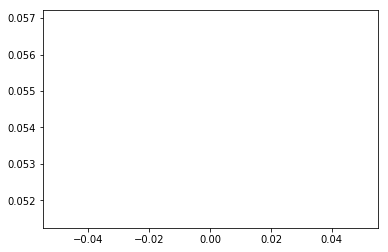

 20%|██        | 20/100 [01:01<03:54,  2.93s/it]

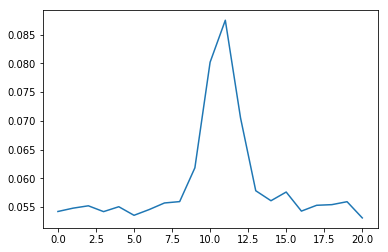

 40%|████      | 40/100 [02:03<02:56,  2.95s/it]

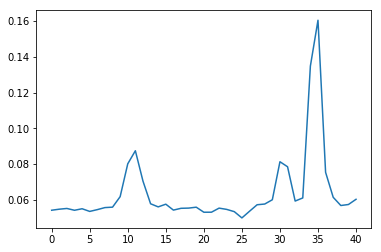

 60%|██████    | 60/100 [03:06<01:58,  2.97s/it]

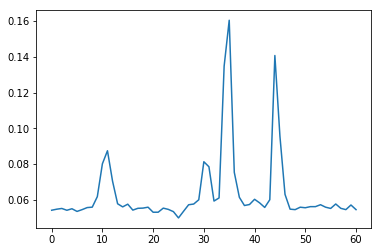

 80%|████████  | 80/100 [04:09<00:59,  2.99s/it]

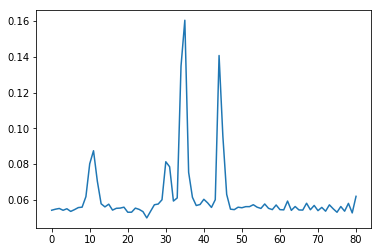

100%|██████████| 100/100 [05:12<00:00,  3.01s/it]


In [15]:
lstm.train(xTrainFeature,allY,batchNum=20,epochNum=100)


In [16]:
state = {'net1':lstm.LSTM.state_dict(),
         'net2':lstm.Linear.state_dict(),
         'optimizer':lstm.opt.state_dict()}
saveName='./save/model.pth'
torch.save(state,saveName)

In [9]:
xTestFeature=torch.from_numpy(xTestFeature).type(torch.float)
xTestFeature= Variable(xTestFeature)
xTestFeature=xTestFeature.cuda(1)


In [17]:
torch.cuda.empty_cache()
gc.collect()


26097

BCE自带sigmoid 所以pre要用sigmoid

In [22]:
# lstm.eval()
with torch.no_grad():
    preY=lstm.forward(xTestFeature)
preY=np.array(preY.cpu())
# testY=np.array(testY.cpu()) 

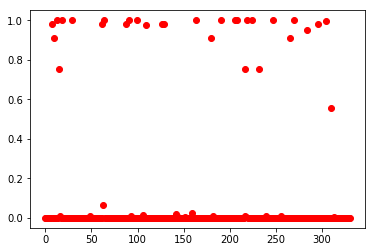

In [23]:
plt.figure()
plt.plot(range(len(preY)),(testY-preY)**2,'ro')
# plt.plot(range(len(testY)),testY,'bx')
plt.show()

In [24]:
sum=len(preY)
true = 0
for i in range(len(preY)):
    if int(preY[i]+0.5) == int(testY[i]) :
        true+=1
    
print('acc:',true/sum)

acc: 0.9093655589123867


In [25]:
for i in range(len(preY)):
#     print('pre:{}\ttrain:{}'.format(preY[i],allY[i]))
    print('pre:{}\ttest:{}'.format(int(preY[i]+0.5),testY[i]))

pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:0	test:[0]
pre:0	test:[0]
pre:0	test:[0]
pre:0	test:[1]
pre:0	test:[0]
pre:0	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[0]
pre:1	test:[1]
pre:1	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[0]
pre:1	test:[1]
pre:0	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:1	test:[1]
pre:0	test:[0]
pre:0	test:[0]
pre:1	test:[1]
pre:0	test:[1]
pre:0	test:[0]
pre:1	test:[0]
pre:1	test:[1]
pre:0	test